# Analise de dados - Vendas

### Criar ambiente virtual no terminal

python -m venv venv

venv\Scripts\activate  # (Windows)

pip install pandas matplotlib seaborn jupyter



### Análise Exploratória

In [13]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados
# Dataset kaggle: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download
df = pd.read_csv("../../datasets/supermarket_sales.csv")

In [3]:
#Exibir as primeiras linhas
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Estatísticas básicas
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# Verificar dados ausentes
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Tipos de dados
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### Estatísticas Básicas

In [8]:
# Total de vendas por categoria
total_por_categoria = df.groupby("Product line")["cogs"].sum()
total_por_categoria

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: cogs, dtype: float64

In [ ]:
# Média de preço unitário por categoria
media_preco = df.groupby("Product line")["Unit price"].mean()
media_preco

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [10]:
# Categoria mais vendidos(em quantidade)
categoria_mais_vendida = df.groupby("Product line")["Quantity"].sum().idxmax()
print(f"Categoria mais vendida: {categoria_mais_vendida}")

Categoria mais vendida: Electronic accessories


In [11]:
# Data com maior volume de vendas
data_maior_venda = df.groupby("Date")["cogs"].sum().idxmax()
print(f"Data com a maior volume de vendas: {data_maior_venda}")

Data com a maior volume de vendas: 3/9/2019


### Visualização de Dados

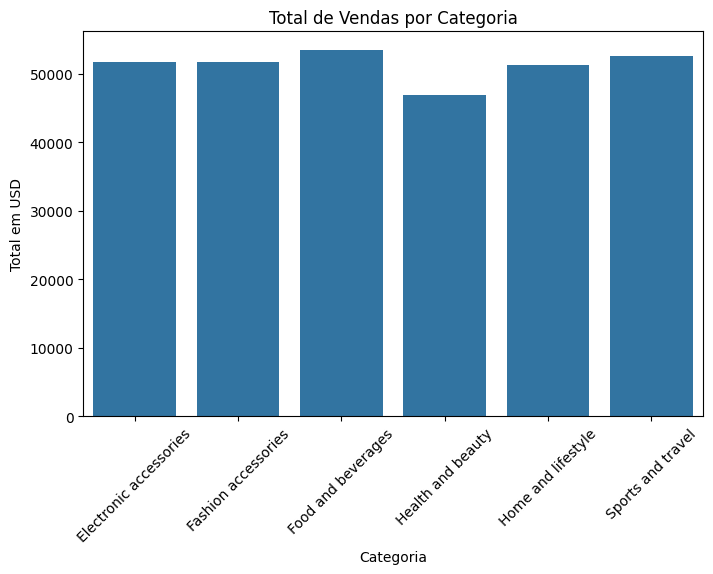

In [14]:
# Total de vendas por Categoria
plt.figure(figsize=(8,5))
sns.barplot(x=total_por_categoria.index, y=total_por_categoria.values)
plt.title("Total de Vendas por Categoria")
plt.ylabel("Total em USD")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.show()

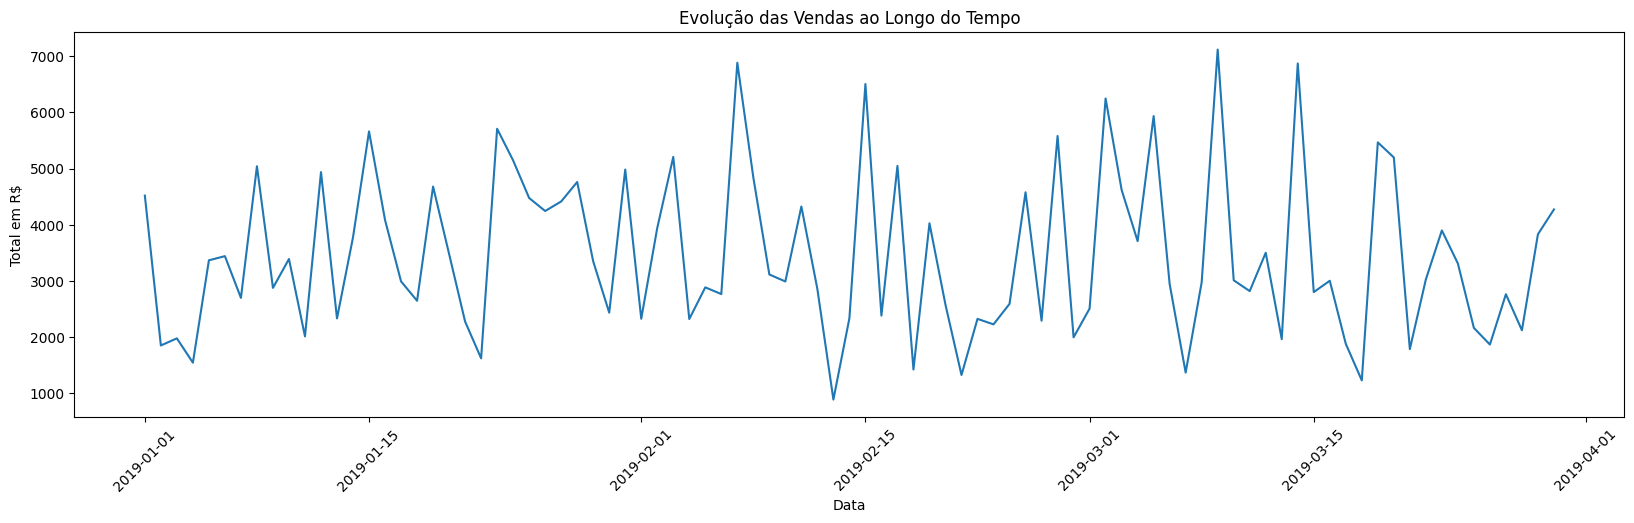

In [24]:
# Evolução das vendas ao longo do tempo
df["Date"] = pd.to_datetime(df["Date"])
df_agrupado = df.groupby("Date")["cogs"].sum().reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(x=df_agrupado["Date"], y=df_agrupado["cogs"], markers="o")
plt.title("Evolução das Vendas ao Longo do Tempo")
plt.ylabel("Total em R$")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.show()

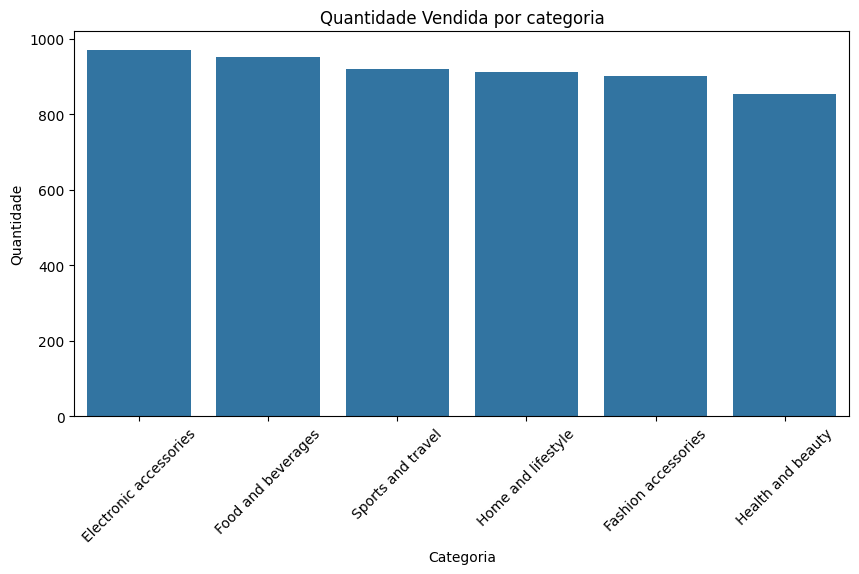

In [23]:
#Categoria mais vendida
categoria_mais_vendida = df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=categoria_mais_vendida.index, y=categoria_mais_vendida.values)
plt.title("Quantidade Vendida por categoria")
plt.ylabel("Quantidade")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.show()